# Feature Selector - Module Guide

This notebook showcases the usage of the FeatureSelector module.

#### Imports

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

#Import packages/modules
from FeatureSelector import FeatureSelector as fs
from FeatureSelector import plot_tools as fs_plot

### Generate Sample

In [2]:
#generate sample for classification modelling
X, y = make_classification(n_samples=5000, n_features=100, n_informative=20, scale=None,
                           weights=[0.6], n_redundant=50, n_repeated=5, n_classes=2,
                           shuffle=True)
df = pd.DataFrame(X, columns=['feature_'+str(ii) for ii in range(X.shape[1])])
df['target'] = y

In [3]:
#separate features and values
X_data = df.iloc[:, :-1]
y_data = df.iloc[:, -1]

In [4]:
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,target
0,-61.400372,85.405303,87.788323,-155.126632,218.967428,-122.982070,-36.074317,235.534947,-173.392514,-21.824899,...,-73.902396,142.932572,337.103201,-10.621732,-25.755729,211.694111,-3.811932,261.404173,-5.095348,0
1,139.709326,10.471306,706.148451,-1280.127172,379.159411,-280.614826,-18.307753,158.520277,-14.510525,217.741941,...,-52.501653,127.972590,-270.626430,34.124469,-20.096534,100.403320,-16.222587,-146.166843,-17.157477,0
2,21.020625,20.768116,-169.148189,-436.011227,-268.936378,-277.316899,7.885040,-193.201185,129.617091,-42.412991,...,-15.519836,-18.355076,-386.664907,-1.624586,205.388226,-100.231283,-2.718983,-61.996817,4.292293,0
3,-232.964191,-70.612384,-504.679232,-462.510227,-249.434753,83.730012,-21.352980,-1207.176429,126.811195,-150.225728,...,-74.424383,159.199670,224.231405,-38.311391,8.985479,-94.422903,6.014440,59.068635,-9.329166,0
4,168.973293,38.837407,-89.369255,-586.251602,293.580135,-175.925342,-47.851597,114.235627,-341.828324,130.574704,...,40.794362,92.217053,-114.889704,17.485368,497.037640,1.405355,-0.514169,-217.328319,-10.079927,0


## Apply Transformations

In [5]:
#without combining original data
X_data_tf = fs.transformations(X_data)
X_data_tf.head()

,feature_0_YEO_JON,feature_1_YEO_JON,feature_2_YEO_JON,feature_3_YEO_JON,feature_4_YEO_JON,feature_5_YEO_JON,feature_6_YEO_JON,feature_7_YEO_JON,feature_8_YEO_JON,feature_9_YEO_JON,...,feature_90_YEO_JON,feature_91_YEO_JON,feature_92_YEO_JON,feature_93_YEO_JON,feature_94_YEO_JON,feature_95_YEO_JON,feature_96_YEO_JON,feature_97_YEO_JON,feature_98_YEO_JON,feature_99_YEO_JON
0,-0.456047,0.946415,0.044588,0.133955,0.742200,-0.514741,-1.009574,0.302467,-0.720893,-0.053778,...,-1.037798,-1.316203,1.326600,1.300527,-0.254804,-0.282186,1.182139,-0.198946,1.962480,-0.250521
1,0.612847,0.138786,1.172214,-1.678487,1.406091,-1.200269,-0.514858,0.175442,0.186130,0.880252,...,0.604957,-0.856954,1.136367,-0.901667,0.958911,-0.251753,0.416153,-1.406199,-0.910388,-0.888941
2,-0.026703,0.249925,-0.469297,-0.319457,-1.207771,-1.185913,0.219605,-0.402924,0.943295,-0.146157,...,-0.151480,-0.068399,-0.731651,-1.297257,-0.004414,0.937080,-0.912709,-0.093224,-0.353135,0.240909
3,-1.334286,-0.743540,-1.175735,-0.362184,-1.132107,0.373202,-0.599727,-2.065120,0.928801,-0.639759,...,0.877169,-1.327423,1.533404,0.872337,-1.032758,-0.096307,-0.875594,0.740644,0.486272,-0.474225
4,0.771197,0.444776,-0.303236,-0.561630,1.051158,-0.744806,-1.337080,0.102414,-1.694339,0.549486,...,0.333067,1.075211,0.681487,-0.367979,0.513026,2.465717,-0.258302,0.119359,-1.378792,-0.513945


In [6]:
#combining with original data
X_data_tf2 = fs.transformations(X_data, combine=True)
X_data_tf2.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_90_YEO_JON,feature_91_YEO_JON,feature_92_YEO_JON,feature_93_YEO_JON,feature_94_YEO_JON,feature_95_YEO_JON,feature_96_YEO_JON,feature_97_YEO_JON,feature_98_YEO_JON,feature_99_YEO_JON
0,-61.400372,85.405303,87.788323,-155.126632,218.967428,-122.982070,-36.074317,235.534947,-173.392514,-21.824899,...,-1.037798,-1.316203,1.326600,1.300527,-0.254804,-0.282186,1.182139,-0.198946,1.962480,-0.250521
1,139.709326,10.471306,706.148451,-1280.127172,379.159411,-280.614826,-18.307753,158.520277,-14.510525,217.741941,...,0.604957,-0.856954,1.136367,-0.901667,0.958911,-0.251753,0.416153,-1.406199,-0.910388,-0.888941
2,21.020625,20.768116,-169.148189,-436.011227,-268.936378,-277.316899,7.885040,-193.201185,129.617091,-42.412991,...,-0.151480,-0.068399,-0.731651,-1.297257,-0.004414,0.937080,-0.912709,-0.093224,-0.353135,0.240909
3,-232.964191,-70.612384,-504.679232,-462.510227,-249.434753,83.730012,-21.352980,-1207.176429,126.811195,-150.225728,...,0.877169,-1.327423,1.533404,0.872337,-1.032758,-0.096307,-0.875594,0.740644,0.486272,-0.474225
4,168.973293,38.837407,-89.369255,-586.251602,293.580135,-175.925342,-47.851597,114.235627,-341.828324,130.574704,...,0.333067,1.075211,0.681487,-0.367979,0.513026,2.465717,-0.258302,0.119359,-1.378792,-0.513945


## Run Selection Tests

### F-Statistic (ANOVA)

In [30]:
%%time
#run test
results, p_vals = fs.f_test(X_data, y_data, kbest=100, p_vals=True)

Wall time: 6.94 ms


In [31]:
#register results
feature_importance = pd.DataFrame(results.values, index=results.index, columns=['f_test'])
feature_importance_values = pd.DataFrame(p_vals.values, index=p_vals.index, columns=['f_test'])

In [32]:
feature_importance.head()

,f_test
feature_0,67
feature_1,13
feature_2,94
feature_3,47
feature_4,74


In [33]:
feature_importance_values.head()

,f_test
feature_0,28.487741
feature_1,0.220985
feature_2,121.574954
feature_3,6.715834
feature_4,35.065837


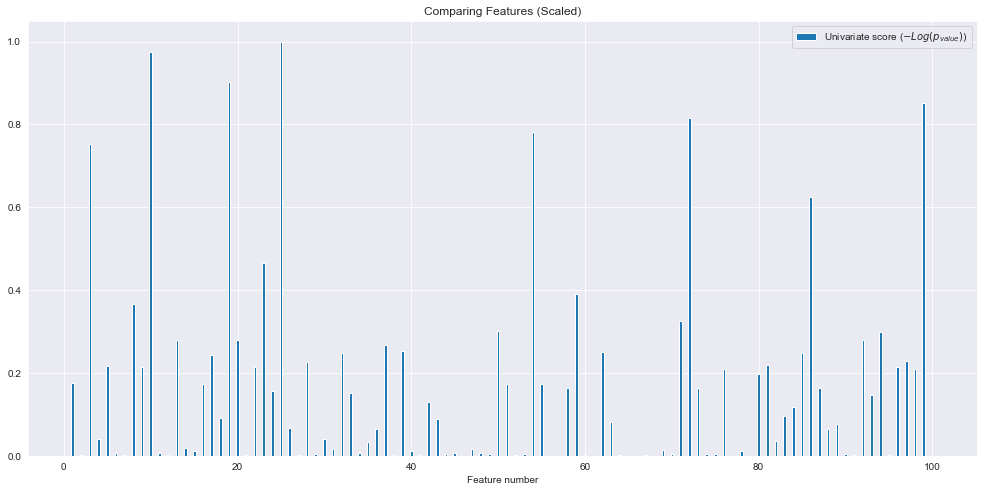

In [34]:
fs_plot.plot_feature_comparison(p_vals, norm=True, label=r'Univariate score ($-Log(p_{value})$)',
                                title='Comparing Features (Scaled)')

### Mutual Information Test

In [35]:
%%time
#run test
results, mi_vals = fs.mitest(X_data, y_data, n_neighbors=5, mi_vals=True)

Wall time: 2.97 s


In [36]:
#register results
feature_importance['mi_test'] = results
feature_importance_values['mi_test'] = mi_vals

In [39]:
feature_importance.head()

,f_test,mi_test
feature_0,67,53
feature_1,13,8
feature_2,94,97
feature_3,47,46
feature_4,74,82


In [40]:
feature_importance_values.head()

,f_test,mi_test
feature_0,28.487741,0.011829
feature_1,0.220985,0.000000
feature_2,121.574954,0.063594
feature_3,6.715834,0.010019
feature_4,35.065837,0.026218


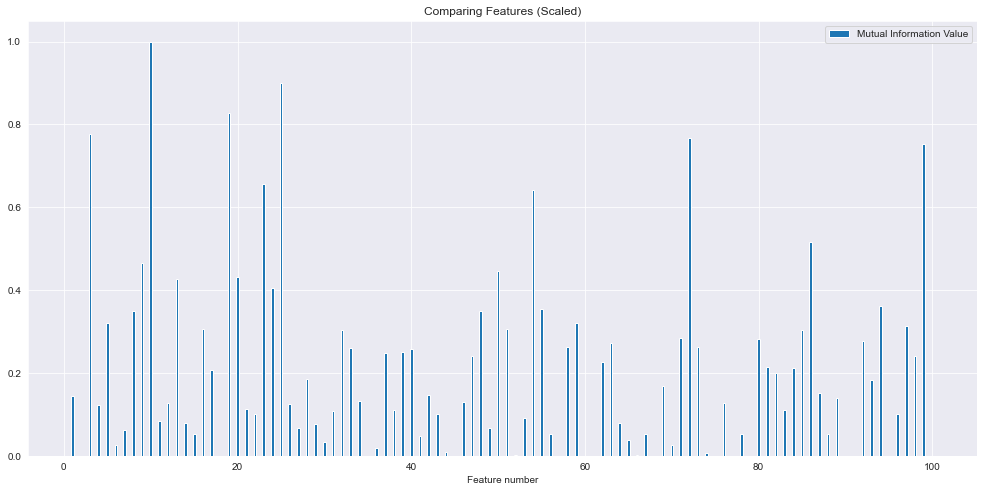

In [41]:
fs_plot.plot_feature_comparison(mi_vals, norm=True, label=r'Mutual Information Value',
                                title='Comparing Features (Scaled)')

### Machine Learning Model - Recursive Factor Elimination

In [45]:
#define model
rf = RandomForestClassifier(n_estimators=200, max_depth=5, n_jobs=4, max_features='sqrt')

In [44]:
%%time
#run test
results, feat_stats, scores = fs.Recursive_Factor_EliminationCV(
    estimator=rf,
    X=X_data,
    y=y_data,
    step=20,
    min_features_to_select=10,
    standardise=False,
    criterion='roc_auc',
    clf_choose='best',
    cv=5,
    n_jobs=4)


Wall time: 17 s


In [54]:
#register results
feature_importance['rf_test'] = results
feature_importance_values['rf_test'] = feat_stats.iloc[:, -1]

In [55]:
feature_importance.head()

,f_test,mi_test,rf_test
feature_0,67,53,53
feature_1,13,8,18
feature_2,94,97,98
feature_3,47,46,51
feature_4,74,82,64


In [56]:
feature_importance_values.head()

,f_test,mi_test,rf_test
feature_0,28.487741,NaN,NaN
feature_1,0.220985,NaN,NaN
feature_2,121.574954,0.113369,0.113369
feature_3,6.715834,NaN,NaN
feature_4,35.065837,NaN,NaN


#### Plot Results

- Plotting scores during recursive feature selection process

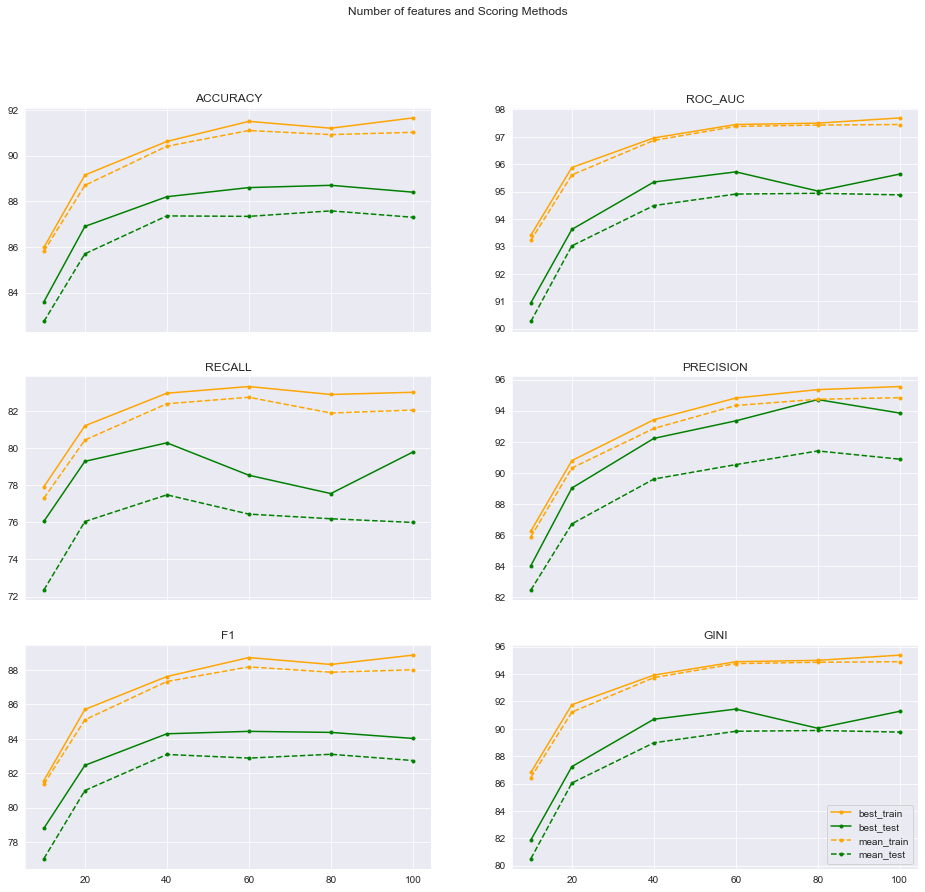

In [46]:
fs_plot.plot_metrics_check(scores)

- Plotting feature importance throughout iterations

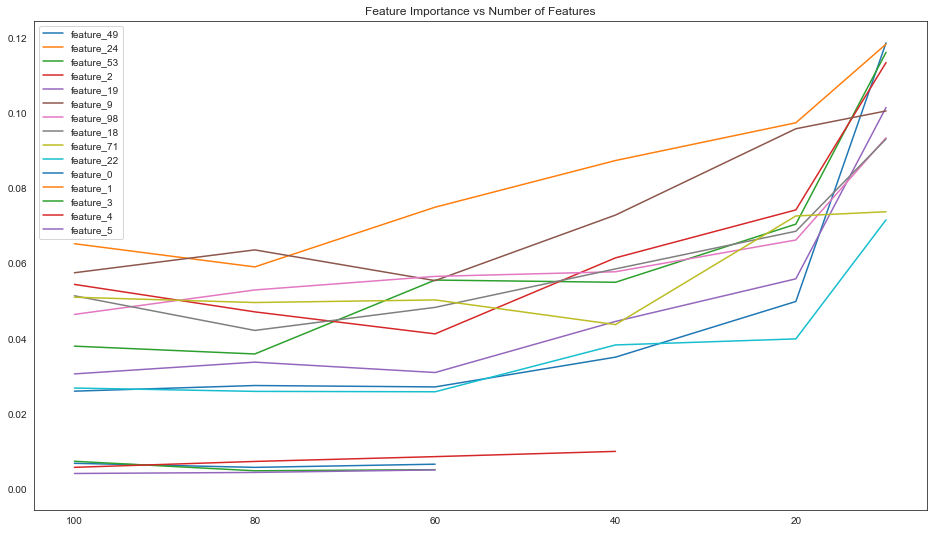

In [47]:
fs_plot.plot_feature_performance(feat_stats, topk=15, legend=True)